In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.autograd import Variable
%matplotlib inline

In [2]:
# Input your data here to train your network
data_csv = pd.read_csv('data.csv', usecols=[1])

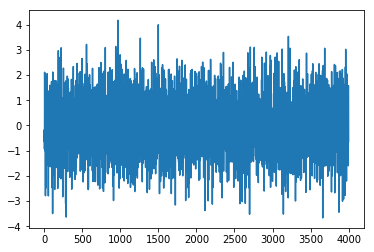

In [3]:
plt.plot(data_csv)

In [4]:
# Preprocessing your data
data_csv = data_csv.dropna()
dataset = data_csv.values
dataset = dataset.astype('float32')
max_value = np.max(dataset)
min_value = np.min(dataset)
scalar = max_value - min_value
dataset = list(map(lambda x: x / scalar, dataset))

In [5]:
# Creating your data set to be used by LSTM - Note the argument look_back
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [6]:
data_X, data_Y = create_dataset(dataset)

In [7]:
# Creating a train and test set
train_size = int(len(data_X) * 0.7)
test_size = len(data_X) - train_size
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]

In [8]:
# Reshaping the data to use with LSTM
train_X = train_X.reshape(-1, 1, 2)
train_Y = train_Y.reshape(-1, 1, 1)
test_X = test_X.reshape(-1, 1, 2)

train_x = torch.from_numpy(train_X)
train_y = torch.from_numpy(train_Y)
test_x = torch.from_numpy(test_X)

In [9]:
# Defining the LSTM module
class lstm_reg(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1, num_layers=2):
        super(lstm_reg, self).__init__()
        
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers) # LSTM-rnn
        self.reg = nn.Linear(hidden_size, output_size) #
        
    def forward(self, x):
        x, _ = self.rnn(x) # (seq, batch, hidden)
        s, b, h = x.shape
        x = x.view(s*b, h) 
        x = self.reg(x)
        x = x.view(s, b, -1)
        return x

In [10]:
# Configure your network to be executed
net = lstm_reg(2, 4)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)

In [11]:
# Train your LSTM using the criteria and optimizer defined above
epochs = 10
losses = np.zeros(epochs)
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
  
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
   
  #Insert piece of code the plot the loss, Hint: You can access loss by loss.data
    losses[e] += loss.data

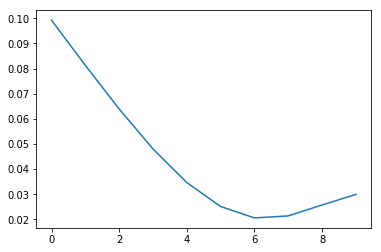

In [12]:
plt.plot(losses)

In [13]:
# Get the network ready to be evaluated
net = net.eval()

In [14]:
# Passing the test data to the network
data_X = data_X.reshape(-1, 1, 2)
data_X = torch.from_numpy(data_X)
var_data = Variable(data_X)
pred_test = net(var_data)

In [15]:
pred_test = pred_test.view(-1).data.numpy()

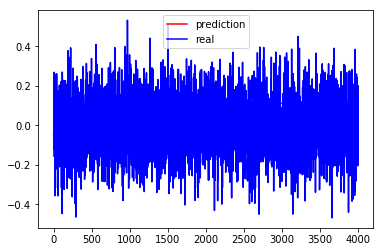

In [16]:
# Plot the real and predicted values
plt.plot(pred_test, 'r', label='prediction')
plt.plot(dataset, 'b', label='real')
plt.legend(loc='best')

### Modify the number of hidden layers to 1, 2, and 3 and see the performance of your network, report your results at the end of this notebook as a plot for varying number of hidden layers

In [17]:
# 1 hidden layer
net = lstm_reg(2, 4, num_layers=1) 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)

# Train your LSTM using the criteria and optimizer defined above
epochs = 10
losses1 = np.zeros(epochs)
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
  
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
   
  #Insert piece of code the plot the loss, Hint: You can access loss by loss.data
    losses1[e] += loss.data

In [18]:
# 2 hidden layers
net = lstm_reg(2, 4, num_layers=2) 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)

# Train your LSTM using the criteria and optimizer defined above
epochs = 10
losses2 = np.zeros(epochs)
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
  
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
   
  #Insert piece of code the plot the loss, Hint: You can access loss by loss.data
    losses2[e] += loss.data

In [19]:
# 3 hidden layers
net = lstm_reg(2, 4, num_layers=3) 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)

# Train your LSTM using the criteria and optimizer defined above
epochs = 10
losses3 = np.zeros(epochs)
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
  
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
   
  #Insert piece of code the plot the loss, Hint: You can access loss by loss.data
    losses3[e] += loss.data

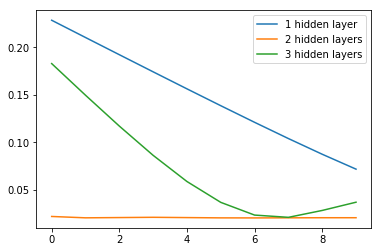

In [20]:
plt.plot(losses1)
plt.plot(losses2)
plt.plot(losses3)
plt.legend(["1 hidden layer","2 hidden layers","3 hidden layers"])

### See how does the performance of the LSTM network varies with varying learning rate, it is lr here. Try making the learning rate large and small and compare the results. You can assume 1e-2 below is optimum, so you can choose a large and a small value accordingly. Report the results as a plot at the end.

In [21]:
# small learning rate
net = lstm_reg(2, 4) 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=(1e-2)/10)

# Train your LSTM using the criteria and optimizer defined above
epochs = 10
losses1 = np.zeros(epochs)
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
  
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
   
  #Insert piece of code the plot the loss, Hint: You can access loss by loss.data
    losses1[e] += loss.data

In [22]:
# large learning rate
net = lstm_reg(2, 4) 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=(1e-2)*10)

# Train your LSTM using the criteria and optimizer defined above
epochs = 10
losses2 = np.zeros(epochs)
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
  
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
   
  #Insert piece of code the plot the loss, Hint: You can access loss by loss.data
    losses2[e] += loss.data

In [23]:
# optimum learning rate
net = lstm_reg(2, 4) 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)

# Train your LSTM using the criteria and optimizer defined above
epochs = 10
losses3 = np.zeros(epochs)
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
  
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
   
  #Insert piece of code the plot the loss, Hint: You can access loss by loss.data
    losses3[e] += loss.data

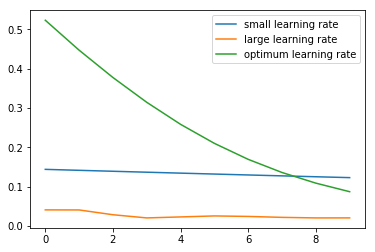

In [24]:
plt.plot(losses1)
plt.plot(losses2)
plt.plot(losses3)
plt.legend(["small learning rate","large learning rate","optimum learning rate"])

### Considering varying the number of total epochs to 10, 100, 1000 and see the effect on the predictions. Note down the time takes for 10, 100 and 1000 epochs to complete.

The elapsed time is:15.365839958190918 s


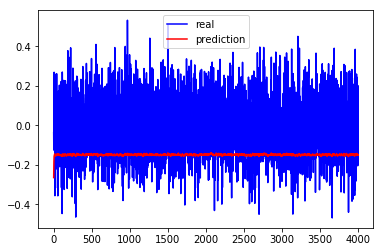

In [25]:
import time
# total of 10 epoches
net = lstm_reg(2, 4) 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)

# Train your LSTM using the criteria and optimizer defined above
epochs = 10
losses1 = np.zeros(epochs)
start_time = time.time()
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
  
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
   
  #Insert piece of code the plot the loss, Hint: You can access loss by loss.data
    losses1[e] += loss.data
    
# Get the network ready to be evaluated
net = net.eval()
# Passing the test data to the network
pred_test = net(var_data)

pred_test = pred_test.view(-1).data.numpy()

# Plot the real and predicted values
plt.plot(dataset, 'b', label='real')
plt.plot(pred_test, 'r', label='prediction')
plt.legend(loc='best')
elapsed_time = time.time() - start_time
print("The elapsed time is:{} s".format(elapsed_time))

The elapsed time is:147.46294593811035 s


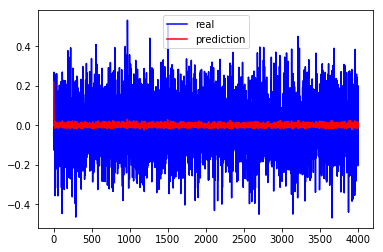

In [26]:
import time
# total of 100 epoches
net = lstm_reg(2, 4) 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)

# Train your LSTM using the criteria and optimizer defined above
epochs = 100
losses2 = np.zeros(epochs)
start_time = time.time()
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
  
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
   
  #Insert piece of code the plot the loss, Hint: You can access loss by loss.data
    losses2[e] += loss.data
    
# Get the network ready to be evaluated
net = net.eval()
# Passing the test data to the network
pred_test = net(var_data)

pred_test = pred_test.view(-1).data.numpy()

# Plot the real and predicted values
plt.plot(dataset, 'b', label='real')
plt.plot(pred_test, 'r', label='prediction')
plt.legend(loc='best')
elapsed_time = time.time() - start_time
print("The elapsed time is:{} s".format(elapsed_time))

The elapsed time is:1478.4792914390564 s


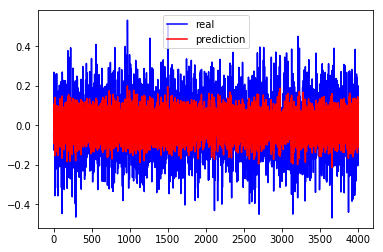

In [27]:
import time
# total of 1000 epoches
net = lstm_reg(2, 4) 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)

# Train your LSTM using the criteria and optimizer defined above
epochs = 1000
losses3 = np.zeros(epochs)
start_time = time.time()
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
  
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
   
  #Insert piece of code the plot the loss, Hint: You can access loss by loss.data
    losses3[e] += loss.data
    
# Get the network ready to be evaluated
net = net.eval()
# Passing the test data to the network
pred_test = net(var_data)

pred_test = pred_test.view(-1).data.numpy()

# Plot the real and predicted values
plt.plot(dataset, 'b', label='real')
plt.plot(pred_test, 'r', label='prediction')
plt.legend(loc='best')
elapsed_time = time.time() - start_time
print("The elapsed time is:{} s".format(elapsed_time))